# Making Inference About a Client's Decision on Subscribing to a Term Deposit Based on The Last Day of Contact

# Introduction:
This project will dive into marketing data from a Portuguese banking institution to evaluate the effect of direct marketing campaigns on term deposit subscriptions. This dataset was obtained from the UCI machine learning repository from the following link: 

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing 

In recent years, research has shown promising results of ‘direct marketing’ as an effective strategy to offer services directly to a specific customer (Menon et al., 2004). As the field of direct marketing has evolved, we want to further investigate the potential factors that could affect a client’s likelihood of subscribing to a term deposit via direct marketing, we have chosen this dataset which contains 1 dependent variable - successful/unsuccessful term deposit subscription, and other explanatory variables that could be potential determining factors that affect consumer decisions. 

A recent study conducted by Hülsheger et al. (2022) suggested lower levels of positive affect at the beginning of the week, uncovering patterns largely in line with popular idioms like “Blue Monday” and “Thank God it’s Friday”. Considering this study, we will explore how the last day of contacting a client influences the client's decision on subscribing to a term deposit. We will investigate and compare the proportions of the clients that subscribed to a term deposit when the last day of contact is Monday vs Friday. Then we will measure the standard deviation of these proportions.

**The question we will answer is: Does the last contact day of the week affect the term deposit subscription rate?**

In order to answer our inferential question, we will explore two random variables: the last contact day of the week (day_of_week) and whether or not the client has subscribed to a term deposit (term_sub). The day_of_week variable consists of five categories detailing each work day which we will then filter to Monday and Friday, and the term_sub variable consists of binary categories, yes or no.


# Part 1: Preliminary Exploratory Data Analysis:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 12)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

In [2]:
set.seed(2022)

#reading the dataset from web 
url<-"https://raw.githubusercontent.com/celike1/Data-for-Stat201/main/bank-additional.csv"
#initial data wrangling

bank_data<- read.csv(url, sep = ";")
bank_data<- subset(bank_data, select = -c(
                                         emp.var.rate,
                                         cons.price.idx,
                                         cons.conf.idx,
                                         euribor3m,
                                         nr.employed))

bank_data <- rename(bank_data,
       term_sub = y)

head(bank_data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,term_sub
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,no
2,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,no
3,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,no
4,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,no
5,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,no
6,32,services,single,university.degree,no,no,no,cellular,sep,thu,128,3,999,2,failure,no


We only care about comparing Monday and Friday, so we use the `filter()` function and the `select()` function to look at those two days specifically with respect to the term subscription column

In [3]:
#final data wrangling 
#we are only going to compare the term subscription rate when the last day of contact is monday and friday
bank_data<- bank_data %>%
            filter(day_of_week == "mon" | day_of_week == "fri")%>%
            select(day_of_week, term_sub)
            
            
head(bank_data)

,day_of_week,term_sub
,<chr>,<chr>
1,fri,no
2,fri,no
3,fri,no
4,mon,no
5,mon,no
6,mon,no


Before we continue with the preliminary data analysis, we check if there are any NA values in our dataset. This way we know if we need to do any additional work in the wrangling process or not

In [4]:
#We check if there is any NA entries in our dataset data in our day_of_week and term_sub column.
sum(is.na(bank_data$day_of_week))
sum(is.na(bank_data$term_sub))

[1] 0

[1] 0

Now we take the overall proportion of yes responses and no responses. The overall proportion of 'yes' vs 'no' is fairly low, which may be an indicator for the bank that their marketing methods simply aren't working.

In [5]:
#Overall count of yes and no for term deposit subscription.
y_count<- bank_data %>% 
    group_by(term_sub) %>% 
    summarize(count=n()) 
y_count

#The proportion of yes and no for term deposit subscription
proportion<- bank_data %>%
    summarise (prop_yes = sum (term_sub == "yes")/ n(),
               prop_no = sum (term_sub == "no")/ n()
)
proportion

term_sub,count
<chr>,<int>
no,1442
yes,181


prop_yes,prop_no
<dbl>,<dbl>
0.1115219,0.8884781


In [6]:
#summary calculations for monday and friday
grouped<-bank_data %>% 
  group_by(day_of_week, term_sub) %>% 
  tally()

grouped

summary<-bank_data %>% 
      group_by(day_of_week) %>%
      summarise(n=n())
summary

day_of_week,term_sub,n
<chr>,<chr>,<int>
fri,no,685
fri,yes,83
mon,no,757
mon,yes,98


day_of_week,n
<chr>,<int>
fri,768
mon,855


In [7]:
#proportion of the clients that agreed to subscribe for term deposit.
prop_days<- bank_data %>%
    summarise (prop_mon = sum (term_sub == "yes")/ as.numeric(select(filter(summary, day_of_week=="mon"), n)),
               prop_fri = sum (term_sub == "yes")/ as.numeric(select(filter(summary, day_of_week=="fri"), n))
)

prop_days

prop_mon,prop_fri
<dbl>,<dbl>
0.2116959,0.2356771


The proportion of Monday vs Friday for the dataset collected is fairly similar. We can visualize it on a barplot to see how similar they are. We can say that this information isn't enough for the bank because of how similar the results are. For them to accurately apply a marketing strategy to their entire consumer-base, a more concrete definition of which day is better (if any) to make calls on should be used. Which is what we will explore with our testing later on in this report.


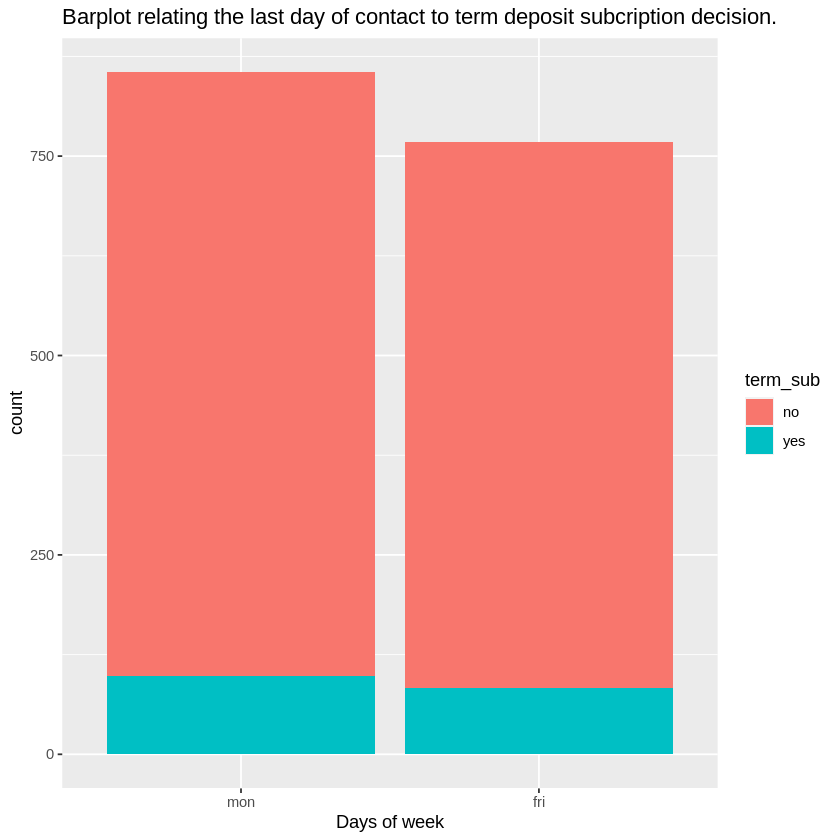

In [8]:
#Barplot relating the last day of contact to term deposit subcription decision.
day_order <- c("mon", "fri")

print(ggplot(bank_data, 
       aes(x = day_of_week, fill = term_sub)) +
  geom_bar() + 
  labs(x = "Days of week")+
  scale_x_discrete(limits = day_order)+
   ggtitle("Barplot relating the last day of contact to term deposit subcription decision."))




In [9]:
#Dataframe for subscription decision proportions
days <- c("Monday", "Friday")
sub_prop <- c(prop_days$prop_mon, prop_days$prop_tue, prop_days$prop_wed, prop_days$prop_thu, prop_days$prop_fri)

df_prop <- data.frame(days, sub_prop)
df_prop

days,sub_prop
<chr>,<dbl>
Monday,0.2116959
Friday,0.2356771


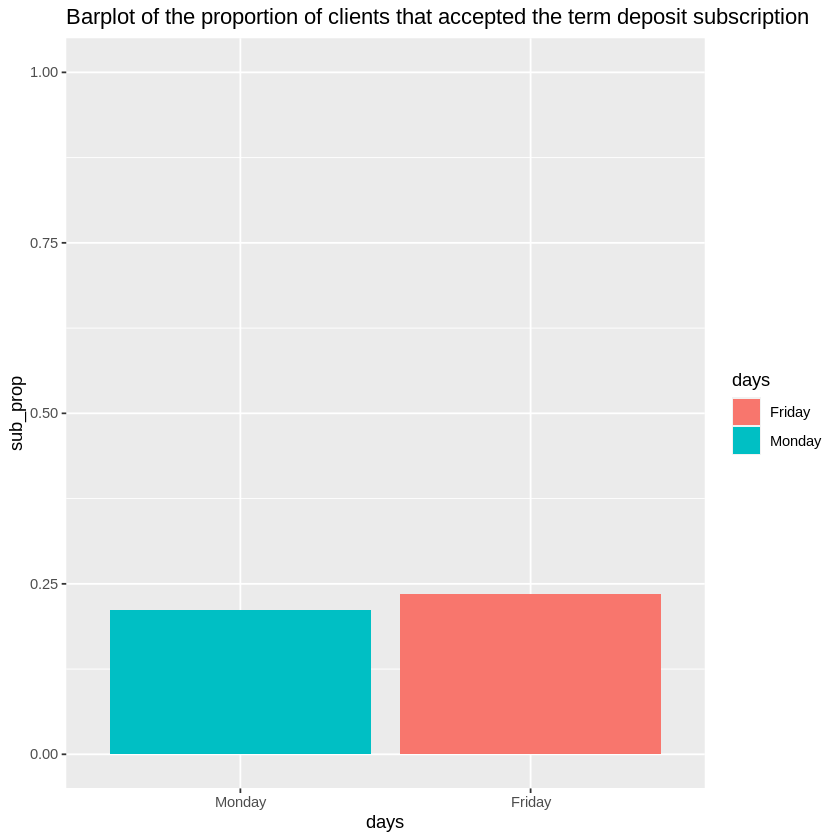

In [10]:
#Barplot of the proportion of clients that accepted the term deposit subscription
order <- c("Monday", "Friday")

print(ggplot(df_prop, aes(x = days, y = sub_prop, fill = days)) +
  geom_bar(stat = "identity")+
  scale_x_discrete(limits = order)+
  coord_cartesian(ylim = c(0, 1))+
  ggtitle("Barplot of the proportion of clients that accepted the term deposit subscription")
     )



# Methods: Plan

To benefit the stakeholders of the Portuguese bank, we draw various statistical inferences from our dataset in order to make conclusions on effective marketing practices. This report will provide an in-depth statistical analysis of two factors: first, by using bootstrapping and applying confidence interval theories, we will determine the mean percentage of clients in the general population who would subscribe to a term deposit, regardless of the day of the week. Following this, by applying hypothesis testing, we will determine the proportion of ‘yes’ responses whether calling on Monday or Friday. The results of our testing will let us infer a conclusion on how these days would affect the proportion of clients subscribing to a term deposit. By applying methods of statistical inference, this study can provide useful insights for the banking institution on how to modify their marketing strategy to best increase term deposit subscriptions.

We expect to see that calls made on Fridays would increase the proportion of term deposits made, this will likely be the result of the weekday characterization referenced in Rystrom’s article (1989) and additional articles referenced in this project. Looking forwards, a discussion could be made about how different groups would be more or less inclined to subscribe to the term deposit and further analysis could allow the firm to pursue a more targeted marketing strategy.


For the first section of the methods, we will explore the 95% confidence intervals of the bootstrapped proportion of clients who would subscribe on Monday vs Friday. We will then compare the results of our bootstrapping to if we were to conduct the same test using hypothesis testing.

Using the infer package, we can easily bootstrap for the difference in proportion of customers saying `'yes'` to a term deposit on Monday vs Friday. By specifying the formula, with `day_of_week` as the explanatory variable, we can bootstrap and calculate our test statistic all at once as follows:

In [11]:
set.seed(1502) # we set the seed to make sure our results can be replicated!

bank_data_bootstrap <- bank_data %>%
    specify(formula = term_sub ~ day_of_week, success = "yes") %>%
    generate(reps = 1000, type = 'bootstrap') %>%
    calculate(stat = "diff in props", order = c("mon", "fri"))

head(bank_data_bootstrap)

replicate,stat
<int>,<dbl>
1,-0.005535033
2,0.003517189
3,0.003831599
4,0.004538703
5,0.018395722
6,0.014747319


Here we can see some of the replicates of our bootstrap for the difference in proportions. With just six replicates, we can't say much about the data so we will go forward to visualize the data using the infer `visualize()` function. And display the confidence interval as part of the plot.

To calculate the confidence interval, we use the `get_confidence_interval()` function, with our previously stated 95% level of confidence, the upper and lower CI are determined as such:

In [12]:
set.seed(1502)

ci_bank <- bank_data_bootstrap %>%
    get_confidence_interval(level = 0.95, type = 'percentile')

ci_bank


lower_ci,upper_ci
<dbl>,<dbl>
-0.02527412,0.03797253


Because we are comparing the difference in proportions of Monday vs Friday, we can accept negative values in our confidence interval. It means that occasionally, more customers subscribe to term deposits on Monday than on Friday. However with our 95% confidence interval, the interval captures zero as well. Meaning that there could be no difference in the proportions of Friday vs Monday. Making it difficult to say whether or not the proportion is favored on a given day. The next step is to use a theory based approach and then to use hypothesis testing to determine the p-value and say whether we reject or do not reject the null hypothesis.

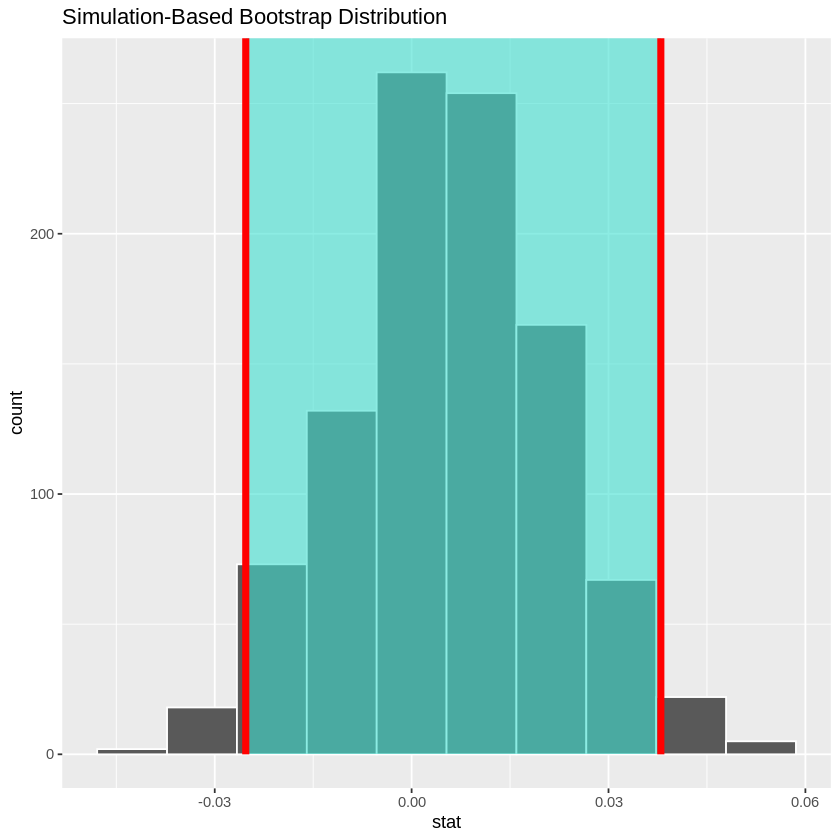

In [13]:
visualize(bank_data_bootstrap, bins = 10) +
    shade_confidence_interval(ci_bank, color = "red")

Using the `visualize()` function, we can see for ourselves the bootstrap distribution of the difference in proportions. A larger set of sample proportions are greater than 0, indicating that Friday has more subscriptions than Monday. The highlighted area shows the confidence interval for convenience. The x axis is our difference in proportions.

Lastly, we can calculate the standard deviation of our distribution, to use later on when comparing our results!

In [14]:
bank_data_bootstrap %>% summarise(se = sd(stat))

se
<dbl>
0.01576416


# Hypothesis Testing

Now, we will conduct hypthesis testing at the 5% significance level to test our two competing hypotheses for this project:

$H_0$: Term deposit subscription rate is the same when the last day of contact is Monday and when the last day of contact is Friday.

$H_A$: Term deposit subscription rate is higher when the last day of contact is Friday.

As it can be seen in out alternative hypothesis we are going to have one-sided alternative for our alternative hypothesis.

Our population parameter of interest is the difference between the proportion of customers that agree to subscribe to a term deposit when the last day of contact is Friday and monday, which can be represented as $p_f - p_m$ where: 

$p_f$ is the proportion of subscribed customers when the last day of contact is friday, and 
 
$p_m$ is the proportion of subscribed customers when the last day of contact is monday.

So now we can express the formulation of our hypothesis test for our population parameter  the difference in population proportions $p_f - p_m$ as follows:

$H_0$ : $p_f - p_m$ = 0
vs
$H_A$ : $p_f - p_m$ > 0



### Hypothesis Testing with infer Package

One of the ways of conducting hypothesis testing is with `infer`  worflow which we will use in the first section of our hypothesis testing.

Now, to construct our null hypothesis we will follow a series of steps. First we use `specify()` to the response variable (`term_sub`) and explanatory variable (`day_of_week`) for our project. Furthermore, since we are interested in the proportion of term deposit subscriptions we set the argument `success` to `"yes"`. We set `hypothesize()` to `"independence"` because our hypotheses involve two samples. Then we use `generate()` to obtain replicates of “shuffled” datasets while assuming $H_0$ is true. We set `type` to `"permute"` because unlike bootsrapping, in hypothesis testing we are resampling without replacement. Finally, we calculate the test statistics 
($\hat{p}_f-\hat{p}_m$) for our each 1000 shuffles. We calculate the test statistics by setting `stat` to `"diff in props"` and since we want to get the difference, we set `order` to `c("fri", "mon")`.

In [15]:
#infer package workflow
null_distribution <- bank_data %>% 
  specify(formula = term_sub ~ day_of_week, success = "yes") %>%
  hypothesize(null = "independence") %>%
  generate(reps = 1000, type = "permute") %>%
  calculate (stat = "diff in props", order = c("fri", "mon"))

head(null_distribution)

replicate,stat
<int>,<dbl>
1,-0.0139619883
2,0.0280564693
3,0.0156980994
4,0.0008680556
5,-0.0238486842
6,0.0058114035


Note that all of the above values represent an instance of $\hat{p}_f-\hat{p}_m$ under our null hypothesis.

Now we will calculate the observed difference in the term deposit subscription rates between friday and monday. To find our observerd statistic ($\hat{p}_f-\hat{p}_m$) we remove `hypothesize()` and `generate()` steps.

In [16]:
obs_diff_prop <- bank_data %>%
    specify(term_sub ~ day_of_week, success = "yes") %>%
    calculate(stat= "diff in props", order = c("fri", "mon"))
obs_diff_prop

stat
<dbl>
-0.006546966


Since the observe statistic is a very small negative number considering the formula ($\hat{p}_f-\hat{p}_m$), we can say this indicates that the proportion of term subscriptiins when the last day of contact is friday is less than the  proportion of term subscriptiins when the last day of contact is monday by a very small amount. However it is important to note that we are conducting hypothesis testing to make sure that this result is not due to chance (sampling variation).

So now, by using `visualize()` we are visualize our null distribution. We also show our observed test staistic with a red line by using `shade_p_value()` function with `obs_stat` set to `obs_diff_prop`. In addition, we set `direction` to `"right"` because we have a one-sided alternative hypothesis where we said that the term deposint subcription rate when the last day of contact is friday will be greater. So we should shade the region that is more extreme, more to the right of our observed statistic.

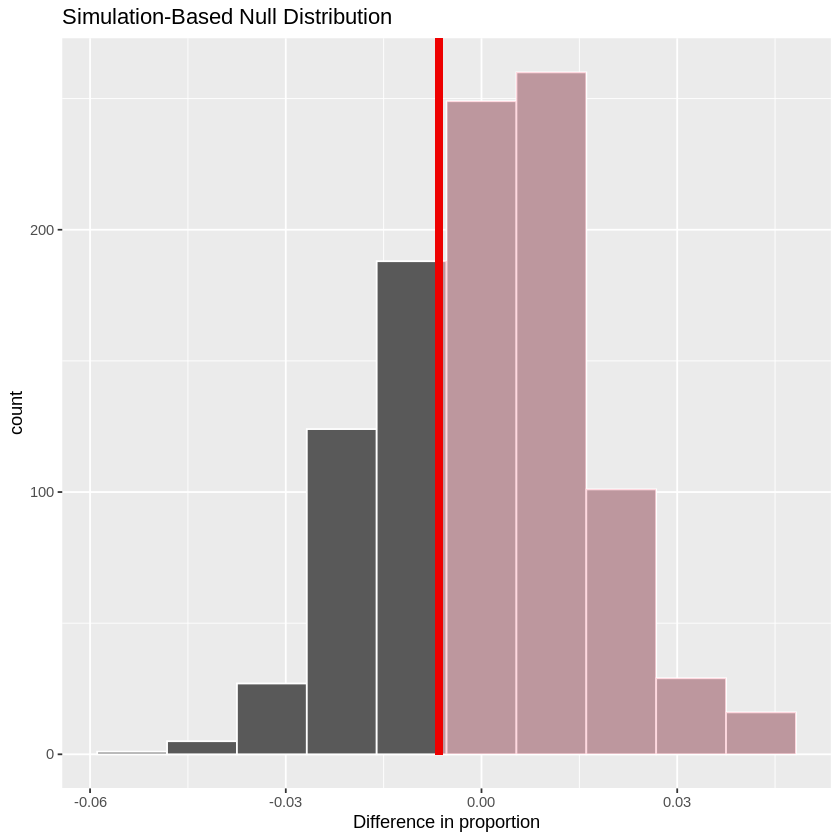

In [17]:
visualize(null_distribution, bins = 10) + 
  shade_p_value(obs_stat = obs_diff_prop, direction = "right") +
    xlab("Difference in proportion")

The shaded region above corresponds to our p-value that will give us the probability of having a test statistic just as extreme or more extreme than the observed test statistic under the  null hypothesis.

So now by using `get_p_value()` , we can see what our p-value is.

In [18]:
p_value<- null_distribution %>%
          get_p_value(obs_stat = obs_diff_prop, direction = "right")
p_value

p_value
<dbl>
0.716


This result indicates that the probability of observing a difference in the term deposit subscription rate as large as -0.006546966 due to sampling variation is  0.716 = 71.6% under null distribution. Considering that we determined our significance level to be 5%, we fail to reject the null hypothesis $H_0$ : $p_f - p_m$ = 0. We do not have enough evidence to think that the term deposit subscriptiom rate is higher when the last day of contact is friday.

### Theory-based hypothesis tests

In this section of our project we are going to conduct theory-based hypotheiss testing compare the results to what we obtained from the `infer` workflow

First we calculate the the oberved test statistic $\hat{p}_f-\hat{p}_m$. 

In [19]:
#test statistic
sub_summary <-
    bank_data %>% 
    group_by(day_of_week) %>% 
    summarise(n = n(), 
              p_hat = mean(term_sub == 'yes')) %>% 
    pivot_wider(names_from = day_of_week, values_from = c(n, p_hat)) %>% 
    mutate(prop_diff = p_hat_fri - p_hat_mon)

sub_summary

n_fri,n_mon,p_hat_fri,p_hat_mon,prop_diff
<int>,<int>,<dbl>,<dbl>,<dbl>
768,855,0.1080729,0.1146199,-0.006546966


Then we add one more column where we show our standard error of the test statistic under the null model.

In [20]:
sub_summary <-
    sub_summary %>% 
    mutate(p = (p_hat_fri * n_fri + p_hat_mon * n_mon)/(n_mon+n_fri),
           null_std_error = sqrt(p*(1-p)*(1/n_fri+1/n_mon))) %>% 
    select(-p)

sub_summary

n_fri,n_mon,p_hat_fri,p_hat_mon,prop_diff,null_std_error
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
768,855,0.1080729,0.1146199,-0.006546966,0.01564945


Lastly we add one more column to calculate the p-value of the test statistic.

In [21]:
sub_summary <- 
    sub_summary  %>% 
    mutate(p_value =  pnorm(prop_diff, 
                            mean = 0,
                            sd = null_std_error, 
                            lower.tail= FALSE))

sub_summary

n_fri,n_mon,p_hat_fri,p_hat_mon,prop_diff,null_std_error,p_value
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
768,855,0.1080729,0.1146199,-0.006546966,0.01564945,0.6621549


It is important to note that in this case we use `pnorm()` fuction instead of `pt()` because we use t-distributon when we do not know the true standad deviation and our formulas rely on standard deviation. However for proportions our standard error folmular does not have standard deviation, therefore we use the normal distribution.  

We get the p-value result of 0.6621549. This is not the same as the p-value we got with the `infer` workflow which was 0.716. Even though these values are different we observe that both of these p-values lead us to fail to reject null hypothesis. The reason why these p-values are different will be expained in the discrussion section below.

The reason why we have different p-values is because when we are doing theory based hypothesis testing we assume normality in our data. We can assume normality when:
- the sample is collected in an independent fashion,
- sample size is more than 10% of the population when sampling is done without replacement,
- sample size is sufficiently large.

We have a different p-value for the theory based method because it assumes normality.


Comparing bootstrapping vs asymptotic approach (theory based), the benefits for using bootstrapping over theory based in the case of the bank is that we do not need to make assumptions about the distribution, for our sample size, bootstrapping should do a good job of representing the population.

# Discussion

To assess our question, we first used an inference method with bootstrapping and constructed a 95% confidence interval. As our question compares two proportions, our interval uses the difference between the proportion of subscribers last contacted on Friday vs Monday. The final confidence interval achieved through our analysis is **(-0.0253, 0.0379)**. This means if we took repeated samples many times, we’d expect about 95% of the confidence intervals created to capture the true value of the population parameter. As this confidence interval includes the value 0, which is our test statistics, it would suggest to us that there is **no true difference** between the proportion of subscribers with contact day being Friday vs Monday; any variation would likely be due to sampling variability. 

To confirm this insight, our team further explored using hypothesis testing. First, we set the significance level to 5% then performed code to find the p-value using both the inference and theory-based methods. The p-value gives the probability of obtaining a value equally or more extreme than observed test statistics, assuming the null hypothesis is true and changes seen are due to sampling variation alone. If p-value < significance level, we reject the null hypothesis and say the results are statistically significant. In this case, we found a p-value = 0.716 when using inference, and a p-value =  0.66 when using the theory-based method. In both cases, the **p-value > 0.05** in a drastic manner hence **we fail to reject the null hypothesis and the results are not statistically significant.**

All insights from the bootstrap confidence interval, inference based, and theory-based hypothesis testing show aligned results. Hence, we fail to conclude that the last contact day of the week affects the term deposit subscription rate. 

This finding was contrary to our original hypothesis and the day-of-the-week effect. The day of the week does not turn out to be an effective predictor of subscription conversion: let’s dive into this further.

To better analyze consumer subscription behaviour, we should understand the specific product at hand: term deposits. Term deposits are a fixed-term investment that offers higher interest rates than a traditional savings account but lower than equity investments such as stocks. Consumers with low-risk tolerance tend to subscribe to term deposits as they are a low-risk investment that is minimally affected by changes in the market. As proposed by Rogalski (1984), the day-of-the-week effect is less prominent in low-risk investments like term deposits and bonds, but more likely in high-risk investments such as stocks due to more market volatility. Further, a study by Arora and Marwaha (2014) suggests that investors consider stability of income as the most important factor when investing in fixed deposits, and the changes over a Friday to Monday period would not have much of an effect on the stability of income.

When approaching term deposit subscriptions, stronger marketing practices to increase conversion rates include analyzing the traits of risk averse customers and creating well-planned tactics and personalization to target those customers (Newstex Global Business Blogs, 2022).

Further, a study conducted by Rani et al. (2019) suggests that implementing demographic information into marketing strategies would also improve the term deposit subscriptions. Collecting and analyzing data on core customer demographics such as age, income level, and education are worth highlighting in future studies. 

From our analysis today we have unveiled that the day of the week is likely not a major influencer of term deposit subscriptions. Moving forwards, banks should collect more consumer data on risk adversity and demographics to enable stronger marketing strategies and subscription conversions.


# References

Arora, S. and Marwaha, K. (2014), "Variables influencing preferences for stocks (high risk investment) vis-à-vis fixed deposits (low-risk investment): A comparative study", International Journal of Law and Management, Vol. 56 No. 4, pp. 333-343. https://doi.org/10.1108/IJLMA-07-2013-0032

Hülsheger, U. R., Uitdewilligen, S., Zijlstra, F. R., & Walkowiak, A. (2022). Blue Monday, yellow Friday? investigating work anticipation as an explanatory mechanism and boundary conditions of weekly affect trajectories. Journal of Occupational Health Psychology, 27(4), 359–376. https://doi.org/10.1037/ocp0000330 

Menon, A. M., Deshpande, A. D., George, M. Z., & Perri, M. (2004). A model assessing the effectiveness of direct-TOCONSUMER advertising: Integration of concepts and measures from marketing and Healthcare. International Journal of Advertising, 23(1), 91–117. https://doi.org/10.1080/02650487.2004.11072874 

Newstex Global Business Blogs. (2022). The 60 second marketer: 5 tips for effective direct marketing campaigns. Chatham: Newstex. Retrieved from https://www.proquest.com/blogs-podcasts-websites/60-second-marketer-5-tips-effective-direct/docview/2640095610/se-2

Rani,T.S., Rangaswamy, E., Panchanatham, N., (2019). Customers’ perception and the role of demographic characteristics in online bank marketing strategies. International Journal of Innovative Technology and Exploring Engineering, 8(11S2), 383-389. https://doi.org/10.35940/ijitee.K1061.09811S219

Rogalski, R.J.(1984), New Findings Regarding Day-of-the-Week Returns over Trading and Non-Trading Periods: A Note. The Journal of Finance, 39: 1603-1614. https://doi.org/10.1111/j.1540-6261.1984.tb04927.x

Rystrom, D. S., & Benson, E. D. (1989). Investor psychology and the day-of-the-week effect. Financial Analysts Journal, 45(5), 75–78. https://doi.org/10.2469/faj.v45.n5.75 